# Data Viz with Matplotlib 3

Today we are exploring scatter plots with `matplotlib`. Along the way we will learn some more advanced features, such as customizing the `legend` or creating a `colorbar`.

First, we will load the data. We will use the same code we used before to load data directly from GitHub.

In [1]:
import pandas as pd
import numpy as np

# Morgan data
morgan_data_url = r'https://raw.githubusercontent.com/non87/Matplotlib-Workshop/master/data/national_reduced.csv'
mogan = pd.read_csv(morgan_data_url)

# Taylor data
taylor_data_url = r'https://raw.githubusercontent.com/non87/Matplotlib-Workshop/master/data/national_reduced.csv'
taylor = pd.read_csv(taylor_data_url)

# Look at the column names and data type
print(f'{morgan.info()}')
print(f"This is how the Morgan data looks like:\n\n{morgan.head()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1192014 entries, 0 to 1192013
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1192014 non-null  int64 
 1   Id          1192014 non-null  int64 
 2   Name        1192014 non-null  object
 3   Year        1192014 non-null  int64 
 4   Gender      1192014 non-null  object
 5   Count       1192014 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 54.6+ MB
None
This is how the Morgan data looks like:

      Girls  Total  Proportion  Year
Year                                
1965     44    252    0.174603  1965
1966     34    258    0.131783  1966
1967     43    314    0.136943  1967
1968     36    299    0.120401  1968
1969     63    396    0.159091  1969


The data is about the use of the names "Morgan" and "Taylor". Unlike the previous data, these `DataFrame`s contain a column about the proportion of newborn Morgan (Taylor) registered as girls. We will see there is some quite movement in that column.

Before proceeding further, we import `plt` and set the `inline` backend.

In [2]:
# Let's not forget to set the backend and load matplotlib 
%matplotlib inline
import matplotlib.pyplot as plt

## Scatter Plots

Using the definition of _scatter plot_ that Google suggests, "A scatter plot uses dots to represent values for two different numeric variables". They are mostly used to study how two variables co-vary. For example, you can plot the number of newborns with a given name for each year. To do this, we will use both `ax.plot()`, which we saw last time, and the new method `ax.scatter()`. Notice however that the syntax is very similar to what we have seen  already.

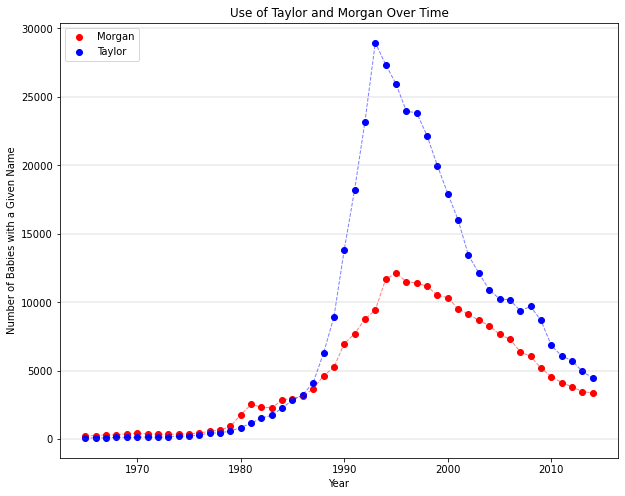

In [10]:
# The fundamental line
fig, ax = plt.subplots(figsize=(10,8))
# Usual settings
ax.set_title('Use of Taylor and Morgan Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Babies with a Given Name')
# Now the scatter plot. The syntax is very similar to the syntax of .plot()
# As a reminder, ls: linestyle; lw: linewidth
ax.plot(morgan['Year'], morgan['Total'], color=(1,0,0,0.5), lw=1, ls='dashed')
ax.scatter(morgan['Year'], morgan['Total'], color='red', label='Morgan')
ax.plot(taylor['Year'], taylor['Total'], color=(0,0,1,0.5), lw=1, ls='dashed')
ax.scatter(taylor['Year'], taylor['Total'], color='blue', label='Taylor')
# Legend
ax.legend(loc='upper left')
# we add an horizontal grid (notice axis='y') for legibility
ax.grid(color=(0.5,0.5,0.5,0.2), axis='y', lw=0.25)

### Colormaps, Colorbars and Marker sizes

As you can see, this is not very different with what we have done so far. What is different from the plots we were doing yesterday is that we have swapped a call to `ax.plot()` with a call to `ax.scatter()`. However, you could produce the plot above without any call to `ax.scatter()` at all: `ax.plot()` suffices. So why bother?

The real power of `ax.scatter()` stands in its special argument `c` (alongside `cmap`) and `ms`. These arguments link the color (`c`/`cmap`) and the sizes of the markers to a variable that you specify. 

#### Colormaps

First, let's work with the `c` and `cmap` arguments. For example, let's tie the color of the markers in the previous plot to the proportion of newborns named "Morgan" ("Austin") registered as "girl". We will use the argument `c` to associate the color of the marker to the new variable. We will use the argument `cmap` to specify more precisely what color we want to associate with the two extremes (no girls vs all girls).


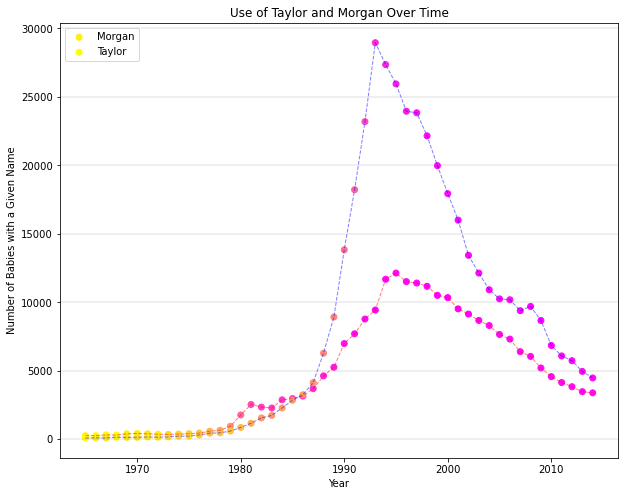

In [11]:
# Same plot as before, but we also need to distinguish the two series of data using different kinds of points.
# The fundamental line
fig, ax = plt.subplots(figsize=(10,8))
# Exactly as before
ax.set_title('Use of Taylor and Morgan Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Babies with a Given Name')
ax.plot(morgan['Year'], morgan['Total'], color=(1,0,0,0.5), lw=1, ls='dashed')
ax.plot(taylor['Year'], taylor['Total'], color=(0,0,1,0.5), lw=1, ls='dashed')
'''
Now the scatter plot. notice the new arguments:
c: color in proportion to a variable
cmap: what color map to use for c
We delete the color argument (it is incompatible with the c argument)
'''
ax.scatter(morgan['Year'], morgan['Total'], c = morgan['Proportion'], label = 'Morgan', cmap='spring_r')
ax.scatter(taylor['Year'], taylor['Total'], c = taylor['Proportion'], label = 'Taylor', cmap='spring_r')
# Legend and grid
ax.legend(loc='upper left')
ax.grid(color=(0.5,0.5,0.5,0.2), axis='y', lw=0.25)

##### Exercise 1

Reproduce the plot above, but use a different `cmap` argument. Choose the new `cmap` from <a href="https://matplotlib.org/stable/tutorials/colors/colormaps.html">the official documentation</a> (scroll down to see the colormaps!). Before choosing a new colormap, try to reason: what makes a color map readable in this case?

**Extra** You may have noticed the legend above is useless at the moment, since we cannot distinguish the two dataseries by their color anymore. Amend the legend by using different markers for the two dataseries. As a reminder, you can specify the marker of your choice through the argument `marker` You can find the complete list of available markers at [this page](https://matplotlib.org/stable/api/markers_api.html).

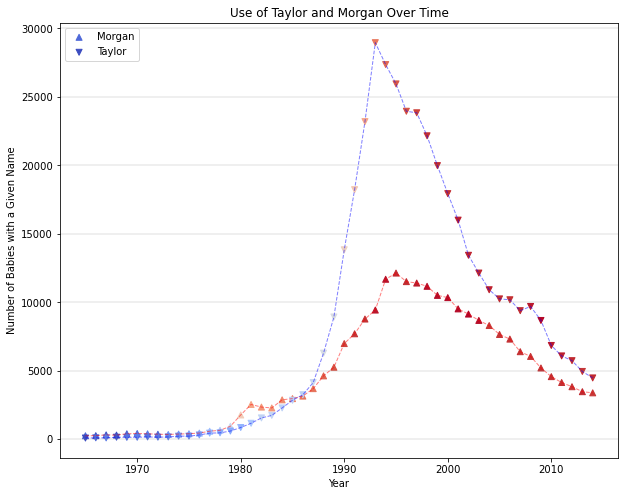

In [12]:
# Same plot as before, but we also need to distinguish the two series of data using different kinds of points.
# The fundamental line
fig, ax = plt.subplots(figsize=(10,8))
# Exactly as before
ax.set_title('Use of Taylor and Morgan Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Babies with a Given Name')
ax.plot(morgan['Year'], morgan['Total'], color=(1,0,0,0.5), lw=1, ls='dashed')
ax.plot(taylor['Year'], taylor['Total'], color=(0,0,1,0.5), lw=1, ls='dashed')
'''
Now the scatter plot. notice the new arguments:
c: color in proportion to a variable
cmap: what color map to use for c
We delete the color argument (it is incompatible with the c argument)
'''
ax.scatter(morgan['Year'], morgan['Total'], c = morgan['Proportion'], label = 'Morgan', cmap='coolwarm', marker='^')
ax.scatter(taylor['Year'], taylor['Total'], c = taylor['Proportion'], label = 'Taylor', cmap='coolwarm', marker='v')
# Legend and grid
ax.legend(loc='upper left')
ax.grid(color=(0.5,0.5,0.5,0.2), axis='y', lw=0.25)

#### Color bars

The previous plot has two big readability issues: 
    
    1. It is impossible to distinguish the two data series since the legend is clearly useless
    2. It needs some guide about the meaning of the markers' color.

As for the former issue, we learned yesterday that all we need is to specify the argument `marker` when we call the `ax.scatter()`. Here it is worth taking a step back to notice that yesterday we did not introduce the `ax.scatter()` method, but we used the `marker` argument in the `ax.plot()` method. It is one of the funding principle of `matplotlib` that you should not have to learn things twice. So, if you learn how to choose a marker type for the `ax.plot()` method, you will know how to choose a marker type in _any_ method. The same principle hold for the `color`, `linewidth`, `markersize`, etc. arguments. You should expect the same arguments to work wherever they are relevant.

Since the `colorbar` implementation is relatively complex, let's start from here.

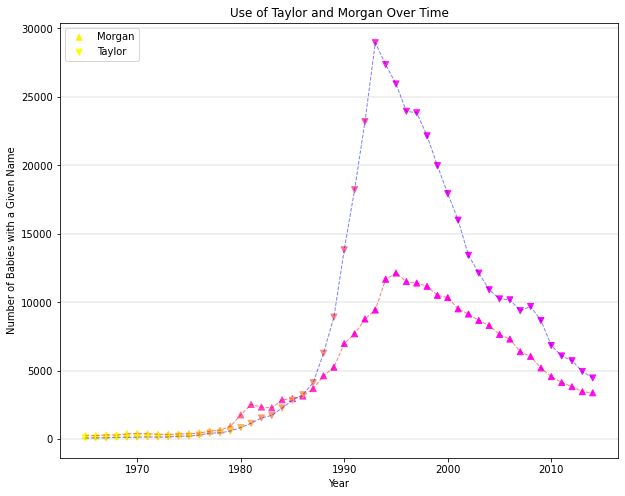

In [13]:
# Same plot as before, but we also need to distinguish the two series of data using different markers
# The fundamental line
fig, ax = plt.subplots(figsize=(10,8))
# Exactly as before
ax.set_title('Use of Taylor and Morgan Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Babies with a Given Name')
ax.plot(morgan['Year'], morgan['Total'], color=(1,0,0,0.5), lw=1, ls='dashed')
ax.plot(taylor['Year'], taylor['Total'], color=(0,0,1,0.5), lw=1, ls='dashed')
# Notice the new marker arguments
ax.scatter(morgan['Year'], morgan['Total'], c = morgan['Proportion'], 
           label = 'Morgan', cmap='spring_r', marker='^')
ax.scatter(taylor['Year'], taylor['Total'], c = taylor['Proportion'], 
           label = 'Taylor', cmap='spring_r', marker='v')
# Legend and grid
ax.legend(loc='upper left')
ax.grid(color=(0.5,0.5,0.5,0.2), axis='y', lw=0.25)

As for the color issue, we will need to implement a `colorbar`, a bar showing how to read the color graduation of the markers. **Warning** This is surprisingly complex in `matplotlib`. One of the reason why this is so complex is that we do not want the `colorbar` to be a part of the the `Axes` with the scatter plot, but we want it plotted immediately close to such `Axes`. So, we will need to tell `matplotlib` that we want the `colorbar` to take some space from the `Axes`. The other reason is that `matplotlib` offers a _lot_ of control over your `colorbar`, but the syntax becomes byzantine as soon as you need something more of the base use.

In the next sub-section, I will show you the base use of `colorbar`. In the extra sub-section, I show a more complex case where we create our own colormap and we are more analytical about the color showed in the `colorbar` (for example, you may choose to not show the entire range of the `cmap`).

#### Base Use

This is a little more complex than what we have done before, so let me walk you through the process step by step. As a first step, we will create the same plot as above. However, we will do something we have not done so far. We will save in a new variable  what the method `ax.scatter()` returns (technically this is a `PatchCollection` object, but do not worry about this). So far, we have ignored all returns from any `Axes` method, but it is often the case that your calls to `ax.scatter()`, `ax.plot()`, `ax.hist()`, etc. return objects that may be useful along the way. In this case, we will need this return for the construction of the `colorbar`.

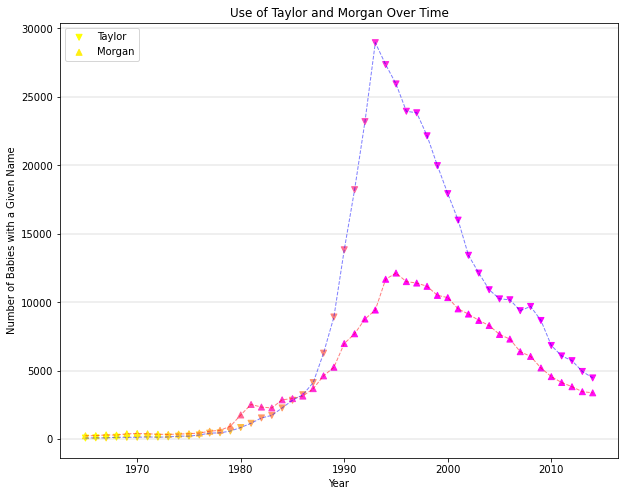

In [35]:
# Same plot as before
fig, ax = plt.subplots(figsize=(10,8))
ax.set_title('Use of Taylor and Morgan Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Babies with a Given Name')
ax.plot(morgan['Year'], morgan['Total'], color=(1,0,0,0.5), lw=1, ls='dashed')
ax.plot(taylor['Year'], taylor['Total'], color=(0,0,1,0.5), lw=1, ls='dashed')
ax.scatter(taylor['Year'], taylor['Total'], c = taylor['Proportion'], 
           label = 'Taylor', cmap='spring_r', marker='v')
# But now notice that we save what ax.scatter returns
for_colorbar = ax.scatter(morgan['Year'], morgan['Total'], c = morgan['Proportion'], 
           label = 'Morgan', cmap='spring_r', marker='^')
# Legend and grid
ax.legend(loc='upper left')
ax.grid(color=(0.5,0.5,0.5,0.2), axis='y', lw=0.25)

Now we will make room for the `colorbar` by subtracting space from the existing `Axes` (that is, `ax`) and creating a new `Axes` that will only contain the `colorbar`. You can think of this as creating a new parasitic `Axes` sucking vital room from the already existing `Axes` -- or, perhaps, you prefer to think about this gruesome imaginary. On a practical level, we will do this by:
1. Importing the function `make_axes_locatable` from `mpl_toolkits.axes_grid1`.
2. Passing the extant `Axes` to this function, which will result into an `AxesDivider`
3. Asking the `AxesDivider` to vampirize the space of the existing `Axes` and create a new one

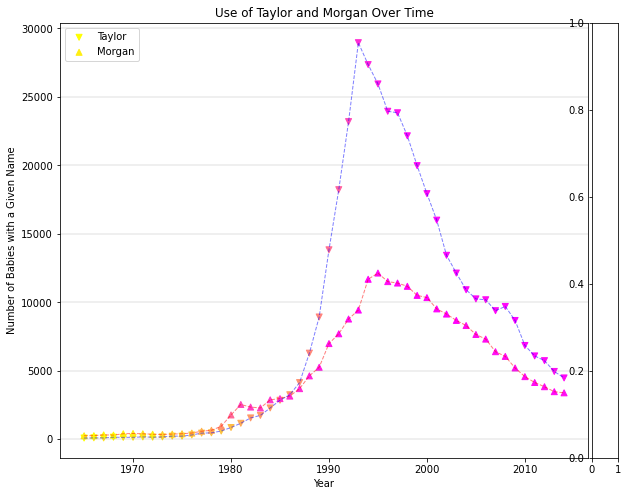

In [36]:
# import the function to take Axes' space
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Take the space
# 1. Create an AxesDivider
divider = make_axes_locatable(ax)
# 2. Ask the AxesDivider vampirize space for the Axes containing the barplot
'''
First argument: where the space will be created (on the right here)
size: how much of the original Axes we are using
pad: distance between the newly-created parasitic Axes and the original Axes 
return: a new Axes!
'''
cax = divider.append_axes('right', size='5%', pad=0.05)
# We ask the notebook to visualize the figure
fig

##### Exercise

Let's play around with the `AxesDivider`. Complete the code below to create a new parasitic `Axes` at the _bottom_ of the main `Axes` and divide it with a `pad` of `0.5` from the main `Axes`. 

**Notice** For once we do not call our `Figure` object `fig` and our `Axes` object `ax`. This is because we do not want to overwrite the `fig` and `ax` we created above.

In [ ]:
# Same plot as before
fig_ex, ax_ex = plt.subplots(figsize=(10,8))
ax_ex.set_title('Use of Taylor and Morgan Over Time')
ax_ex.set_xlabel('Year')
ax_ex.set_ylabel('Number of Babies with a Given Name')
ax_ex.plot(morgan['Year'], morgan['Total'], color=(1,0,0,0.5), lw=1, ls='dashed')
ax_ex.plot(taylor['Year'], taylor['Total'], color=(0,0,1,0.5), lw=1, ls='dashed')
ax_ex.scatter(taylor['Year'], taylor['Total'], c = taylor['Proportion'], 
           label = 'Taylor', cmap='spring_r', marker='v')
# But now notice that we save what ax.scatter returns
for_colorbar_ex = ax_ex.scatter(morgan['Year'], morgan['Total'], c = morgan['Proportion'], 
           label = 'Morgan', cmap='spring_r', marker='^')
ax_ex.legend(loc='upper left')
ax_ex.grid(color=(0.5,0.5,0.5,0.2), axis='y', lw=0.25)

# Now the color bar, all at once

# Take the space
# 1. Create an AxesDivider
divider_ex = make_axes_locatable(ax_ex)
# 2. Ask the AxesDivider vampirize space for the Axes containing the barplot
cax_ex = divider_ex.append_axes('bottom', size='5%', pad=0.5)

At this point all we need to do is calling the `fig.colorbar()` method. For our purposes, this method has three main argument we need to specify:
1. As a first positional argument, we need to pass something from which the `colorbar` will be able to infer a color scale. Here we will let the `colorbar` figure out what color scale we want by itself.
2. The second argument we need to specify is the `cax` (_not_ `ax`!) argument, which regulates what `Axes` the `colormap` occupies. We will pass here the parasitic `Axes` we created for the occasion. (Try to pass the main `Axes` to this argument and see what happens!)
3. The final argument is the `label`, where you should indicate the variable that the color map represents; in our case "Proportion of Girls"

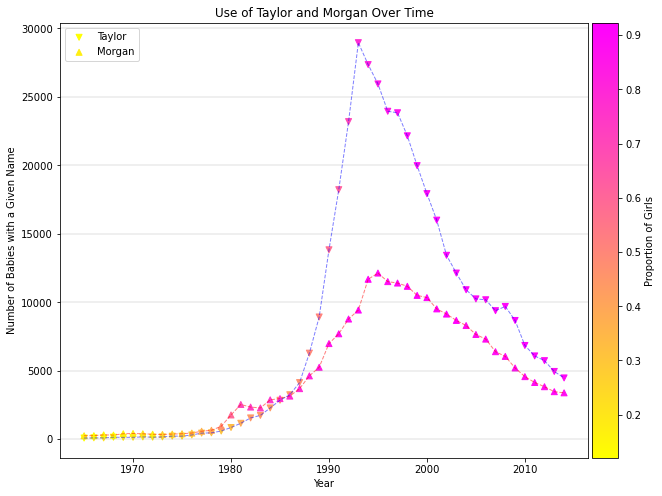

In [38]:
'''
The call to fig.colorbar()
Positional argument: regulates color scale, here we pass the patchcollection saved above
cax: which ax will the colormap occupy?
label: what variable are representing with the color map?
'''
fig.colorbar(for_colorbar, cax=cax, label='Proportion of Girls')
# visualize the figure
fig

##### Exercise

Complete the code to create a `colorbar` at the _bottom_ of the main `Axes`. The code to create the new `Axes` at the bottom of the main `Axes` is already wirtten. You only need to fill the new `Axes` with the actual `colorbar`.


**Extra** What's wrong with the `colorbar` now? Try to pass the argument `orientation="horizontal"` and see what happens.

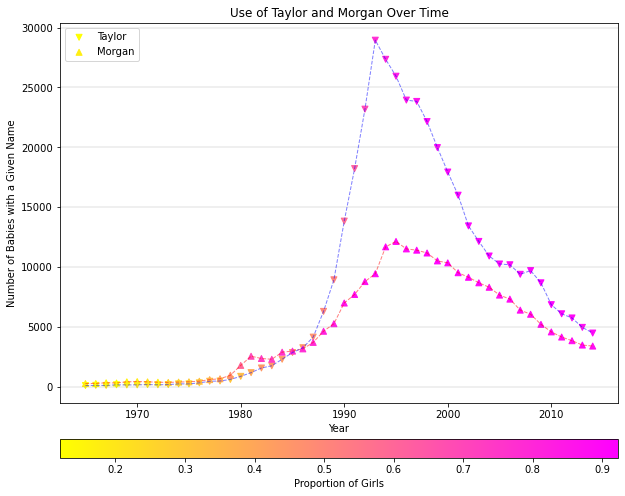

In [40]:
# Same plot as before
fig_ex, ax_ex = plt.subplots(figsize=(10,8))
ax_ex.set_title('Use of Taylor and Morgan Over Time')
ax_ex.set_xlabel('Year')
ax_ex.set_ylabel('Number of Babies with a Given Name')
ax_ex.plot(morgan['Year'], morgan['Total'], color=(1,0,0,0.5), lw=1, ls='dashed')
ax_ex.plot(taylor['Year'], taylor['Total'], color=(0,0,1,0.5), lw=1, ls='dashed')
ax_ex.scatter(taylor['Year'], taylor['Total'], c = taylor['Proportion'], 
           label = 'Taylor', cmap='spring_r', marker='v')
# But now notice that we save what ax.scatter returns
for_colorbar_ex = ax_ex.scatter(morgan['Year'], morgan['Total'], c = morgan['Proportion'], 
           label = 'Morgan', cmap='spring_r', marker='^')
ax_ex.legend(loc='upper left')
ax_ex.grid(color=(0.5,0.5,0.5,0.2), axis='y', lw=0.25)

# Now the color bar, all at once

# Take the space
# 1. Create an AxesDivider
divider_ex = make_axes_locatable(ax_ex)
# 2. Ask the AxesDivider vampirize space for the Axes containing the barplot
cax_ex = divider_ex.append_axes('bottom', size='5%', pad=0.5)

# 3. Now the call to fig.colorbar()
fig_ex.colorbar(for_colorbar_ex, cax=cax_ex, label='Proportion of Girls', orientation='horizontal')

####  Marker Sizes and Legend Personalization

Ok, we will come back to the previous plot in the extra section below -- it is a little more complex, so it is "Extra". For the moment, let's focus on the markers' sizes and how to modify them. Here we will use the `s` argument of `ax.scatterplot()`. You may pass both an `s` argument and a `c` (`cmap`) argument at the same time, but this will result in a confusing plot. As a rule of thumb, it is good to pass either the `c` (`cmap`) argument or the `s` argument. The `s` argument is to be preferred when you want to represent sizes. The `c` parameter is usually clearer for any other case. 

Since we want to use `s` to represent sizes, it makes sense to change the way the information is presented. The size of the markers will represent how many newborns are given the name "Morgan" ("Taylor") each year. On the y-axis we will have the proportion of newborns who are girls. 

Notice, for once `ax.legend()` is not good at inferring where to put the legend. We will pass the argument `loc` to this method to explicitly position the legend in rather empty upper left part of the plot.

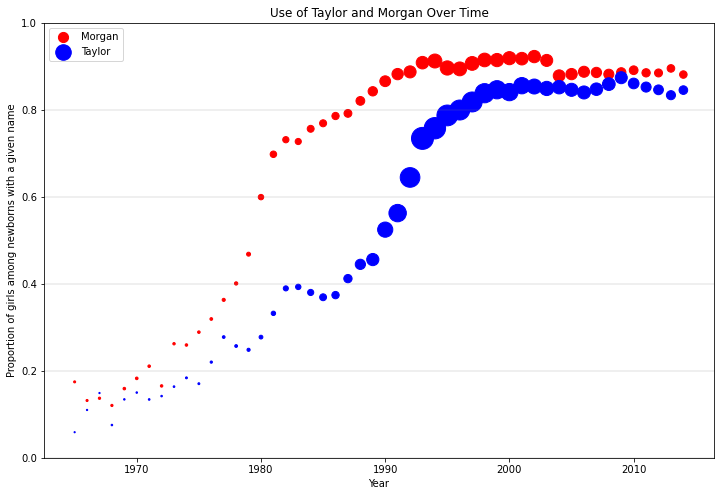

In [44]:
# The usual
fig, ax = plt.subplots(figsize=(12,8))
ax.set_title('Use of Taylor and Morgan Over Time')
ax.set_xlabel('Year')
# Now the change starts. We put proportion of girls on the y axis
ax.set_ylabel('Proportion of girls among newborns with a given name')
ax.set_ylim([0,1])
# Now the scatter plot. notice the new arguments:
# s: size of the markers. Notice we divide by 60 to get acceptable sizes
ax.scatter(morgan['Year'], morgan['Proportion'], s = morgan['Total']/60, label = 'Morgan', color = 'red')
ax.scatter(taylor['Year'], taylor['Proportion'], s = taylor['Total']/60, label = 'Taylor', color = 'blue')
# Legend and grid
ax.legend(loc='upper left')
ax.grid(color=(0.5,0.5,0.5,0.2), axis='y', lw=0.25)

##### Exercise

In the previous plot, we used the marker size (`s`) to represent the number of newborns given a certain name and we used the y-axis to show the proportion of girls among those newborns. Complete the code below to swap this around: use the marker size (`s`) to represent the proportion of girls and use the y-axis to represent the number of babies born with a given name.

**Notice** In the plot above, when we passed the `s` argument to `ax.scatter()`, we multiplied the `Total` columns of the two `DataSet` by a constant `60` to reach an aesthetically-pleasing result. You will have to do the same here, albeit with a different numerical constant. Try few values and choose the one you like most.

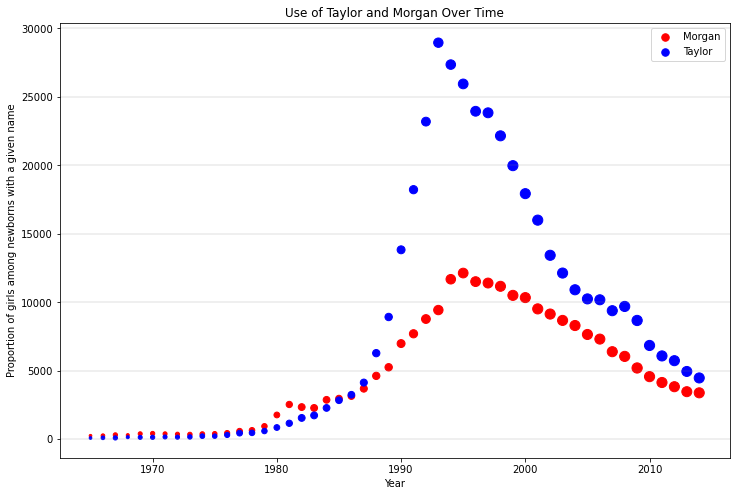

In [54]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set_title('Use of Taylor and Morgan Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Proportion of girls among newborns with a given name')
# Now the scatter plot. Swap the information
ax.scatter(morgan['Year'], morgan['Total'], s = taylor['Proportion']*120, label = 'Morgan', color = 'red')
ax.scatter(taylor['Year'], taylor['Total'], s = taylor['Proportion']*120, label = 'Taylor', color = 'blue')
# Legend and grid
ax.legend()
ax.grid(color=(0.5,0.5,0.5,0.2), axis='y', lw=0.25)

Now, the problem with the previous plots is that there is no indication whatsoever of what the marker size should mean. We need to change the `legend` and we will have to manually set what is displayed. 

To do this, the only difficulty is to manually create objects representing what we want the `legend` to show. Specifically, we want the legend to show 4 markers:

1. A middle size red marker to be coupled with the label "Morgan"
2. A middle size blue marker to be coupled with the label "Taylor"
3. A small size white (black borders) marker to be coupled with the label "100"
4. A big size white (black borders) marker to be coupled with the label "10,000"

The first two markers in the `legend` show the meaning of the color code. The last two markers show the meaning of the marker size. As a side notice, I did not do the math and I put random labels to these last markers! If this was a publication-level plot you would have to figure out the exact size-value map. I believe, there must be a way to get this information directly from `matplolib` objects, but I am honestly not sure how. 

To produce the abstract objects representing the 4 markers we eventually want in the `legend`, we need to go one level deeper in the `matplotlib` API. Specifically, we need to get the abstract representation of lines, confusingly called `Line2D` from the `matplotlib.lines` submodule. Yes, even if we want to show round markers, we will need to go through the `Line2D` object, because a point is thought of as a line with only one point. The call to this object is quite self-explanatory at this point of the workshop and I will go through it in the comments below.

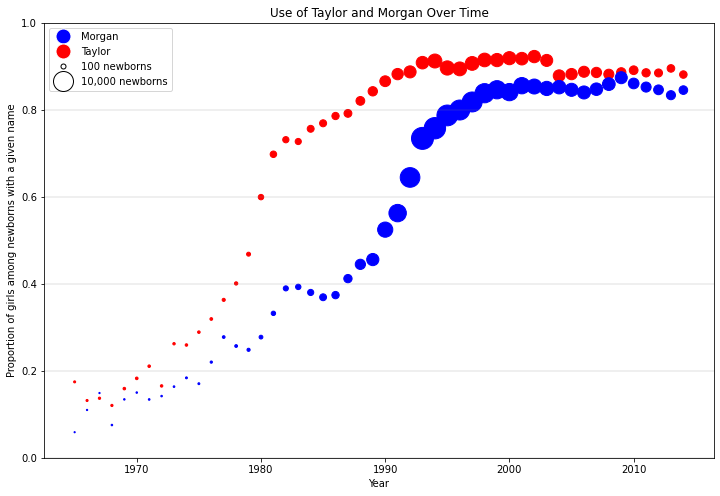

In [78]:
# Same plot as above
fig, ax = plt.subplots(figsize=(12,8))
ax.set_title('Use of Taylor and Morgan Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Proportion of girls among newborns with a given name')
ax.set_ylim([0,1])
ax.scatter(morgan['Year'], morgan['Proportion'], s = morgan['Total']/60, label = 'Morgan', color = 'red')
ax.scatter(taylor['Year'], taylor['Proportion'], s = taylor['Total']/60, label = 'Taylor', color = 'blue')
ax.grid(color=(0.5,0.5,0.5,0.2), axis='y', lw=0.25)

# Now create the abstract object
from matplotlib.lines import Line2D

'''
Line2D arguments:
first positional argument: xdata. This is irrelevant for this code. We will pass the placeholder xdata 0
second positional argument: ydata. This is irrelevant for this code. We will pass the placeholder ydata 0
marker: what kind of marker we want. Use the same as in the plot ('o')
linestyle: the style of the line to be put behind the marker. We set it to "None" for no line
color: the color of the marker *border*
facecolor: the color of the marker *fill* (or inside)
markersize: how big the marker is
'''
legend_elements = [Line2D([0], [0], marker='o', color='white', linestyle='None',
                          markerfacecolor='blue', markersize=15),
                  Line2D([0], [0], marker='o', color='white', linestyle='None',
                          markerfacecolor='red', markersize=15),
                  Line2D([0], [0], marker='o', color='black', linestyle='None',
                          markerfacecolor='white', markersize=5),
                  Line2D([0], [0], marker='o', color='black', linestyle='None',
                          markerfacecolor='white', markersize=20)]


# New legend
ax.legend(legend_elements, ['Morgan', 'Taylor', '100 newborns', '10,000 newborns'], loc='upper left')

##### Exercise

Modify the code below to add a new marker in the `legend`. The new marker should appear between the third marker (labelled "100 newborns") and the fourth marker (labelled "10,000 newborns"). It shall be identical to the third and fourth marker but have a `markersize=12.5`. In the `legend`, the new marker shall be labelled "5050 newborns".

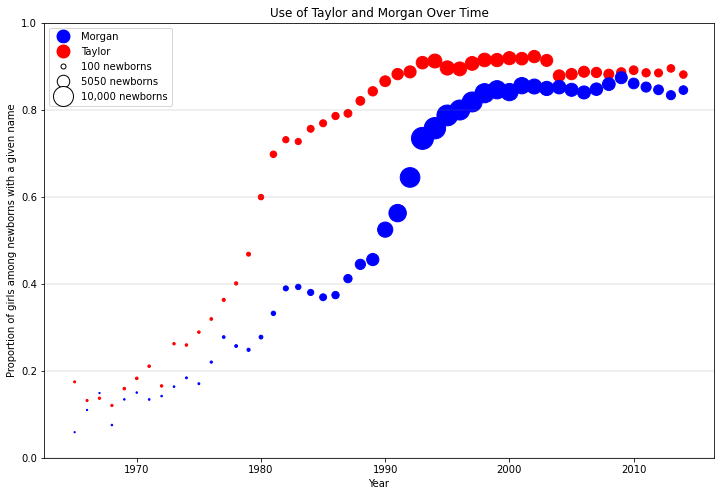

In [77]:
from matplotlib.patches import Circle, CirclePolygon
from matplotlib.lines import Line2D

# Add the new marker
legend_elements = [Line2D([0], [0], marker='o', color='white', linestyle='None',
                          markerfacecolor='blue', markersize=15),
                  Line2D([0], [0], marker='o', color='white', linestyle='None',
                          markerfacecolor='red', markersize=15),
                  Line2D([0], [0], marker='o', color='black', linestyle='None',
                          markerfacecolor='white', markersize=5),
                  Line2D([0], [0], marker='o', color='black', linestyle='None',
                          markerfacecolor='white', markersize=12.5),
                  Line2D([0], [0], marker='o', color='black', linestyle='None',
                          markerfacecolor='white', markersize=20)]
# Same plot as above
fig, ax = plt.subplots(figsize=(12,8))
ax.set_title('Use of Taylor and Morgan Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Proportion of girls among newborns with a given name')
ax.set_ylim([0,1])
ax.scatter(morgan['Year'], morgan['Proportion'], s = morgan['Total']/60, label = 'Morgan', color = 'red')
ax.scatter(taylor['Year'], taylor['Proportion'], s = taylor['Total']/60, label = 'Taylor', color = 'blue')
ax.grid(color=(0.5,0.5,0.5,0.2), axis='y', lw=0.25)

# Add the new marker
ax.legend(legend_elements, ['Morgan', 'Taylor', '100 newborns', '5050 newborns', '10,000 newborns'], loc='upper left')

### Extra: More advanced uses of `fig.colorbar()` and create your own `cmap`

It looks like the `colorbar` scale does not actually reach the ends of the `cmap` -- there are no `0` and `1` in the `colorbar`! This is not just a matter of not showing the `0` or `1` marks in the `colormap` `axis`. The issue is that when we pass (as we do above) a `Collection` as the first positional argument of `fig.colorbar()`, the color span of the resulting `colorbar` will only contain those colors that are actually present in the plot. This means that our `colorbar` does not contain the extremes of the chosen `cmap` (that is pure yellow and pure purple) since values of `0` and `1` are never observed in the plot. 

To get a sense of this, notice how the `colormap` changes once we use the "Morgan" data to create our `colormap`.

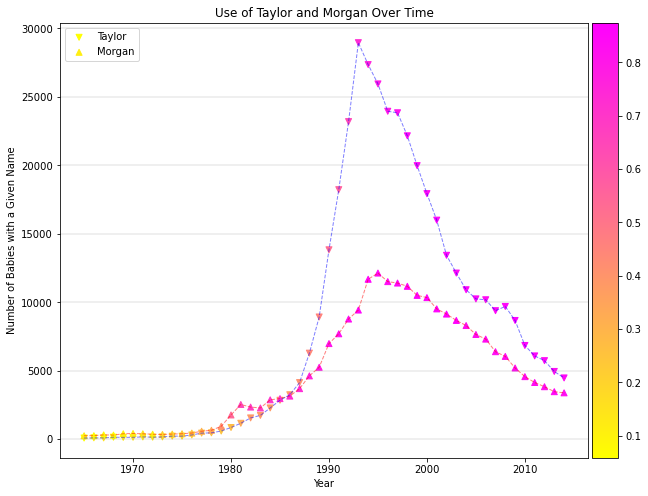

In [28]:
# Same plot as before
fig, ax = plt.subplots(figsize=(10,8))
ax.set_title('Use of Taylor and Morgan Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Babies with a Given Name')
ax.plot(morgan['Year'], morgan['Total'], color=(1,0,0,0.5), lw=1, ls='dashed')
ax.plot(taylor['Year'], taylor['Total'], color=(0,0,1,0.5), lw=1, ls='dashed')
# But now we take the return of the "Taylor" call to ax.scatter()
for_colorbar = ax.scatter(taylor['Year'], taylor['Total'], c = taylor['Proportion'], 
           label = 'Taylor', cmap='spring_r', marker='v')
ax.scatter(morgan['Year'], morgan['Total'], c = morgan['Proportion'], 
           label = 'Morgan', cmap='spring_r', marker='^')
ax.legend(loc='upper left')
ax.grid(color=(0.5,0.5,0.5,0.2), axis='y', lw=0.25)

# Same color bar code (but we pass something different)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(for_colorbar, cax=cax, label='Proportion of Girls')

The `colormap` color span changed! Again, this is due to the colors (values) actually observed in the "Taylor" data as opposed to the colors (values) observed in the "Morgan" data. 

But this is far from ideal. It is clear that if we use the colors from the "Taylor" data, the `colormap` will not cover the highest colors (values) of the "Morgan" data. On the other hand, if we use the colors from the "Morgan" data, the `colormap` will not cover the lowest colors (values) of the "Taylor" data. Quite clearly, we need to manually specify the color range for the `colorbar`. While we are here, we will specify that we want the entire `cmap`: all the colors in the color map from `0` to `1`.

To do this, we need to pass a `ScalarMappable` as the first argument of the `fig.colorbar()` call.  A `ScalarMappable` maps numerical values to coordinates in the RGBA space -- it is responsible for the transformation of a number to a color in our plots above. In practice, you input a number between 0 and 1 and it outputs a color. This entails that we will also need to manually instantiate such an object: we will use a new submodule of `matplotlib` for this purpose, `matplotlib.cm`. `Matplotlib.cm` deals with things related to color maps. Step by step, this is what we will do:    

1. Import `matplotlib.cm` as `cm`
1. We need to create a normalizer. This will be an object of the type `cm.colors.Normalize`. This object has two main arguments, _vmin_ and _vmax_. These arguments specify the lowest (highest) numerical values that you need to map to RGBA coordinates -- these extreme values map onto the extremes of your colormap. The `cm.colors.Normalize` object transforms scalar numbers between _vmin_ and _vmax_ into scalars between 0 and 1 -- as the name suggests, the object actually normalizes the input! In our case, we are dealing with a proportion, whose natural span is \[0,1\]. So, we will pass `vmin=0` and `vmax=1`.
2. Instatiate an object of the class `cm.ScalarMappable`. As its first positional, we will pass the `Normalize` just created. Moreover, we need to specify what color map we want in the `cm.ScalarMappable` through the `cmap` argument. You can both pass your own personalized `cmap`, or the usual keywords corresponding to the pre-installed color maps in `matplotlib`. 

<div class="alert alert-block alert-success">
    <b>Different Normalizer</b>: There are many ways to map a range of values to the real numbers between 0 and 1. The <code>cm.colors.Normalize()</code> object described above uses a liner projection. However, one may want to use different, non-linear methods -- such as a logarthmic mapping. <a href="  https://matplotlib.org/3.1.0/tutorials/colors/colormapnorms.html
        ">This tutorial</a> shows you the different possibilities already implemented in matplotlib.
    </div>

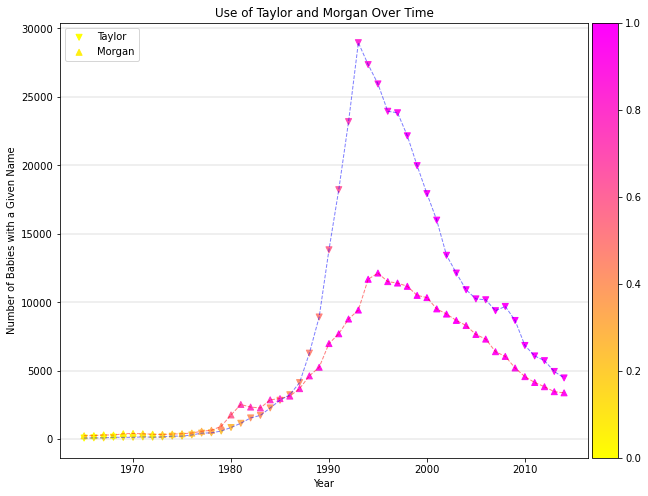

In [30]:
# Usual plot
fig, ax = plt.subplots(figsize=(10,8))
ax.set_title('Use of Taylor and Morgan Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Babies with a Given Name')
ax.plot(morgan['Year'], morgan['Total'], color=(1,0,0,0.5), lw=1, ls='dashed')
ax.plot(taylor['Year'], taylor['Total'], color=(0,0,1,0.5), lw=1, ls='dashed')
# But we do not need to save any return now!
ax.scatter(taylor['Year'], taylor['Total'], c = taylor['Proportion'], 
           label = 'Taylor', cmap='spring_r', marker='v')
ax.scatter(morgan['Year'], morgan['Total'], c = morgan['Proportion'], 
           label = 'Morgan', cmap='spring_r', marker='^')
ax.legend(loc='upper left')
ax.grid(color=(0.5,0.5,0.5,0.2), axis='y', lw=0.25)

# Create the parasitic Axes
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)

# New part
# Import cm
import matplotlib.cm as cm
# Create the Normalize object as discussed above
norm=cm.colors.Normalize(vmin=0, vmax=1)
# Now the ScalarMappable to be passed to colorbar
# Notice that we pass the same cmap used in the plot
scalar_mappable = cm.ScalarMappable(norm, cmap='spring_r')

# Finally, we can pass the Scalar mappable just created to the colorbar
fig.colorbar(scalar_mappable, cax=cax, label='Proportion of Girls')

Much better! As a final touch, we will also learn how to construct our own colormap. It is traditional (at least in Western societies) to signal a newborn boy with the color blue and a newborn girl with the color pink. Questionable as it may be, this colorscheme will probably be immediately readable by a Western audience. So, let's implement this colorscheme in our own `cmap`.

Under the hood, a `cmap` is an object converting values between 0 and 1 to RGBA coordinates. The `cm.Normalize()` object we created above makes sure values are normalized between 0 and 1 before being ingested by the `cmap`. So, when maplotlib passes the normalized data (i.e. from 0 to 1) to a `cmap` , it gets back the RGBA coordinate for each point based on the data. To create a `cmap` , we need to invert this operation. That is, we need to specify a way to map number from 0 to 1 to RGBA coordinates. 

To create our own map from number to RGBA, we will use the `LinearSegmentedColormap` object from the `matplotlib.colors` sub-moduel. We will use the named colors 'lightskyblue' and 'pink' as the extremes of our colormap. Lightskyblue will map to 0 (all newborns with a given name were registered as boys) and pink will map to 1 (all newborns with a given name were registered girls). In between, we will use a linear interpolation between these two colors -- `LinearSegmentedColormap` does this for us.


<div class="alert alert-block alert-success">
    <b>LinearSegmentedColormap</b>: LinearSegmentedColormap is a powerful, yet complex object. Our case is actually the simplest possible -- we just have two colors, at the start and the end of the scale. In cases like these, one can use the `.from_list()` method to create the colormap -- as shown in the code below. What happens when we want a specific color (say white) in the exact middle of the scale? LinearSegmentedColormap can manage this case, and more complex cases. See <a href="https://matplotlib.org/3.1.0/gallery/color/custom_cmap.html#sphx-glr-gallery-color-custom-cmap-py">this tutorial</a> for a more extensive introduction.
    </div>

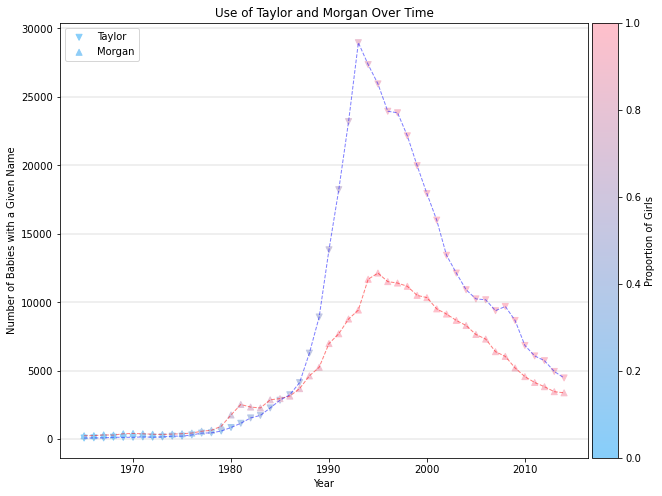

In [32]:
# Import what we need to create a cmap
from matplotlib.colors import LinearSegmentedColormap
# Create the cmap. We only specify the name and the colors at the extremes
new_cmap = LinearSegmentedColormap.from_list(name = 'boy_girl_cmap', colors = ['lightskyblue', 'pink'])

# Same plot as above
fig, ax = plt.subplots(figsize=(10,8))
ax.set_title('Use of Taylor and Morgan Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Babies with a Given Name')
ax.plot(morgan['Year'], morgan['Total'], color=(1,0,0,0.5), lw=1, ls='dashed')
ax.plot(taylor['Year'], taylor['Total'], color=(0,0,1,0.5), lw=1, ls='dashed')
# Notice the new colormap!
ax.scatter(taylor['Year'], taylor['Total'], c = taylor['Proportion'], 
           label = 'Taylor', cmap=new_cmap, marker='v')
ax.scatter(morgan['Year'], morgan['Total'], c = morgan['Proportion'], 
           label = 'Morgan', cmap=new_cmap, marker='^')
ax.legend(loc='upper left')
ax.grid(color=(0.5,0.5,0.5,0.2), axis='y', lw=0.25)

# Now the colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
norm=cm.colors.Normalize(vmin=0, vmax=1)
# Scalar mappable: notice the new colormap
scalar_mappable = cm.ScalarMappable(norm, cmap=new_cmap)
fig.colorbar(scalar_mappable, cax=cax, label='Proportion of Girls')

##### Exercise E

Create your own new `cmap`. Use any two colors you would like as extremes, but remember to create some contrast.

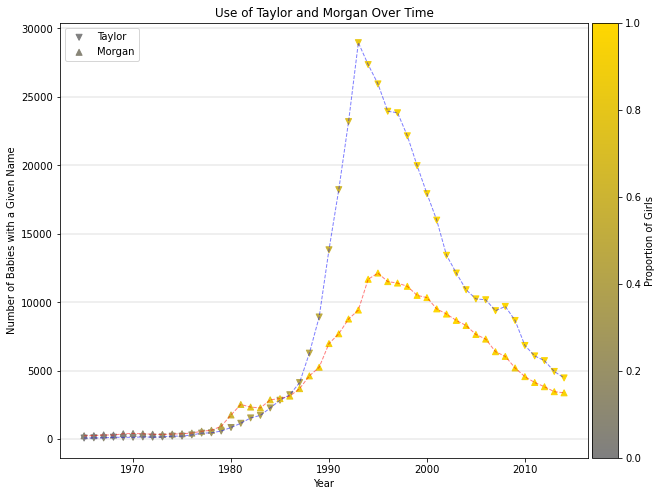

In [39]:
# Create the cmap. We only specify the name and the colors at the extremes
cmap_exercise = LinearSegmentedColormap.from_list(name = 'new_cmap', colors = ['tab:grey', 'gold'])

# Same plot as above
fig, ax = plt.subplots(figsize=(10,8))
ax.set_title('Use of Taylor and Morgan Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Babies with a Given Name')
ax.plot(morgan['Year'], morgan['Total'], color=(1,0,0,0.5), lw=1, ls='dashed')
ax.plot(taylor['Year'], taylor['Total'], color=(0,0,1,0.5), lw=1, ls='dashed')
# Notice the new colormap!
ax.scatter(taylor['Year'], taylor['Total'], c = taylor['Proportion'], 
           label = 'Taylor', cmap=cmap_exercise, marker='v')
ax.scatter(morgan['Year'], morgan['Total'], c = morgan['Proportion'], 
           label = 'Morgan', cmap=cmap_exercise, marker='^')
ax.legend(loc='upper left')
ax.grid(color=(0.5,0.5,0.5,0.2), axis='y', lw=0.25)

# Now the colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
norm=cm.colors.Normalize(vmin=0, vmax=1)
# Scalar mappable: notice the new colormap
scalar_mappable = cm.ScalarMappable(norm, cmap=cmap_exercise)
fig.colorbar(scalar_mappable, cax=cax, label='Proportion of Girls')